# Hedonische Qualitätsberechnung

- Zu den Eigenschaften der Objekte zählen 
  - Strukturvariabeln (z.B. Anzahl Zimmer, Nettowohnfläche, Alter), 
  - Nutzungsvariabeln (Erst-, Zweitwohnung) und 
  - Lagevariablen (z.B. Distanz zum ÖV, Sicht, Exposition, Lärmbelastung).

In [1]:
#invite people for the Kaggle party
#from scipy.stats import norm
#from sklearn.preprocessing import StandardScaler
#from scipy import stats
#import warnings
#warnings.filterwarnings('ignore')


path = '/Users/sspaeti/Simon/Sync/Business/13_sspaeti/Real-estate/_DATASETS/immo24/immo24_BS/'

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
sns.set_palette("Set3")
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

# machine learning
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
#XGboost
import xgboost as xgb
#statmodelsのGLMを使えるようにするモジュール
import statsmodels.api as sm
#GLMの中で用いる統計処理関数のインポート, chi**2の値などの算出に使用している 
from scipy import stats 
#Rのglmを使用可能にするための関数
import statsmodels.formula.api as smf 

# ## OLS, GLM: Gaussian response data

In [51]:
#bring in the six packs
filename = 'train_properties.csv' #'train_properties_big.csv' #'train_properties_BE_SO.csv'
df_train = pd.read_csv(path + '/input/' + filename, sep=';', error_bad_lines=False)

##removing redudant or not useless columns
#colsToIgnore =  ['sellingPrice', 'agency.companyName2', 'agency.companyPhoneBusiness', 'agency.companyPhoneMobile', 'agency.companyPhonePrivate', 'agency.companyPoBox', 'agency.companyPoBoxFormatted', 'agency.companyStreet', 'agency.email', 'agency.firstName', 'agency.gender', 'agency.lastName', 'agency.logoUrl', 'agency.nameFormatted', 'agency.reference', 'agency.webUrl', 'attributesSize.floorFormatted', 'attributesSize.volumeFormatted', 'attributesSurrounding.distanceKindergartenFormatted', 'attributesSurrounding.distanceMotorwayFormatted', 'attributesSurrounding.distancePublicTransportFormatted', 'attributesSurrounding.distanceSchool1Formatted', 'attributesSurrounding.distanceSchool2Formatted', 'attributesSurrounding.distanceShopFormatted', 'availableFromFormatted', 'contactFormTypeId', 'grossPremiumFormatted', 'images', 'municipalityNameFormatted', 'normalizedPriceFormatted', 'numberOfRoomsFormatted', 'pdfs', 'priceFormatted', 'priceUnitLabel', 'referenceNo', 'sellingPriceFormatted', 'showContactForm', 'showContactFormAddress', 'surfaceLivingFormatted', 'surfacePropertyFormatted', 'surfaceUsableFormatted', 'title', 'url', 'urlTitle', 'videos', 'virtualTours', 'visitName', 'visitPhone', 'visitRemark', 'routeDepartureCity', 'routeDepartureWork', 'routeDestinationCity', 'routeDestinationWork', 'transitsAllCity', 'transitsAllWork']
# drop by Name
#df_train = df_train.drop(colsToIgnore, axis=1)

#add new calculations
#df_train['pricePerSquareMeter'] = df_train['normalizedPrice'] / df_train['surfaceLiving']
#df_train['attributes.yearBuiltRange'] = pd.cut(df_train['attributes.yearBuilt'], [0,1,1500,1850,1950,1960,1970,1980,1990,2000,2010,2020,2030,2400])
#df_train['attributes.yearBuiltRange'] = df_train['attributes.yearBuiltRange'].apply(str)

#show rows and columns
df_train.shape

/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,9,11,20,21,22,25,26,46,48,64,69,75,77,89,113,119,120,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(86746, 137)

In [52]:
#set display row option to show all attributes of df
pd.set_option('display.max_rows', 1000)

list(df_train)

display(df_train[df_train['id']==4934218])

df_train[df_train['id']==4934218]['propertyType']
df_train[df_train['id']==4934218]['numberOfRooms']

#Schwer verkäuflich sind laut Immobilienexperten Dachgeschoßwohnungen in B-Lagen sowie exklusive 
#Innenstadtwohnungen mit Preisen über 4000 Euro pro Quadratmeter.

"""
#Objekttyp
--> propertyType
#Strukturvariablen 
--> numberOfRooms, living (Wohnfläche), surfaceProperty (Grundstücksfläche), surfaceUsable(Nutzfläche) 
  , volume (Kubatur)
  #Altersentwertung 
  , yearBuilt, yearRenovated, newBuilding (also yearBuilt=this year..)
#Lagevariablen
--> routeDurationSecCity (time until next bigger city (choosen from user)), routeDistanceMetersCity
  , routeDurationSecWork, routeDistanceMetersWork
    #Sicht, Exposition, Lärmbelastung
    
""" 

,id,accountId,agency.companyCity,agency.companyName1,agency.companyName2,agency.companyPhoneBusiness,agency.companyPhoneMobile,agency.companyPhonePrivate,agency.companyPoBox,agency.companyPoBoxFormatted,...,routeDestinationCity,routeDestinationWork,routeDistanceMetersCity,routeDistanceMetersWork,routeDurationSecCity,routeDurationSecWork,transitsAllCity,transitsAllWork,transitsNoWalkingCity,transitsNoWalkingWork
51248,4934218,767429,Langenthal,RE/MAX Oberaargau - Langenthal,Immoring GmbH,062 923 44 88,079 360 04 87,NaN,NaN,NaN,...,bern Hauptbahnhof,"swissqual, Allmendweg 8, 4528 Zuchwil",40170.0,14884.0,2693.0,2715.0,5.0,3.0,2.0,1.0
51249,4934218,767429,Langenthal,RE/MAX Oberaargau - Langenthal,Immoring GmbH,062 923 44 88,079 360 04 87,NaN,NaN,NaN,...,bern Hauptbahnhof Hauptbahnhof Hauptbahnhof Ha...,"swissqual, Allmendweg 8, 4528 Zuchwil",40170.0,14884.0,2693.0,2715.0,5.0,3.0,2.0,1.0


'\n#Objekttyp\n--> propertyType\n#Strukturvariablen \n--> numberOfRooms, living (Wohnfläche), surfaceProperty (Grundstücksfläche), surfaceUsable(Nutzfläche) \n  , volume (Kubatur)\n  #Altersentwertung \n  , yearBuilt, yearRenovated, newBuilding (also yearBuilt=this year..)\n#Lagevariablen\n--> routeDurationSecCity (time until next bigger city (choosen from user)), routeDistanceMetersCity\n  , routeDurationSecWork, routeDistanceMetersWork\n    #Sicht, Exposition, Lärmbelastung\n    \n'

# Linear Regression
Use this link to create a linear regression on erklärenden Variablen (Struktur, Nutzung, Lage)

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

## ModelPredict

### LinerRegression

In [60]:
train_df2 = df_train

##columns to include in calculation
#--> all: colsToKeep =   ['normalizedPrice', 'attributes.newBuilding', 'attributes.oldBuilding', 'attributes.yearBuilt', 'attributes.yearRenovated', 'attributesInside.attic', 'attributesInside.nrBathRooms', 'attributesInside.propView', 'attributesOutside.propBalcony', 'attributesOutside.propElevator', 'attributesOutside.propParking', 'attributesSize.numberOfFloors', 'attributesSize.volume', 'attributesSurrounding.distanceKindergarten', 'attributesSurrounding.distancePublicTransport', 'attributesSurrounding.distanceSchool1', 'attributesSurrounding.distanceShop', 'cityName', 'isBuyRent', 'numberOfRooms', 'propertyCategoryId', 'propertyType', 'surfaceLiving', 'surfaceProperty', 'surfaceUsable', 'routeDistanceMetersCity', 'routeDistanceMetersWork', 'routeDurationSecCity', 'routeDurationSecWork', 'transitsNoWalkingCity', 'transitsNoWalkingWork']
#only number fields
colsToKeep = ['normalizedPrice', 'attributes.newBuilding', 'attributes.oldBuilding', 'attributes.yearBuilt', 'attributes.yearRenovated', 'attributesInside.attic', 'attributesInside.nrBathRooms', 'attributesInside.propView', 'attributesOutside.propBalcony', 'attributesOutside.propElevator', 'attributesOutside.propParking', 'attributesSize.numberOfFloors', 'attributesSize.volume', 'attributesSurrounding.distanceKindergarten', 'attributesSurrounding.distancePublicTransport', 'attributesSurrounding.distanceSchool1', 'attributesSurrounding.distanceShop', 'numberOfRooms', 'propertyCategoryId', 'surfaceLiving', 'surfaceProperty', 'surfaceUsable', 'routeDistanceMetersCity', 'routeDistanceMetersWork', 'routeDurationSecCity', 'routeDurationSecWork', 'transitsNoWalkingCity', 'transitsNoWalkingWork', 'zip', 'propertyTypeId', 'longitude', 'latitude', 'attributes.middleHouse', 'attributes.swimmingPool', 'attributesInside.firePlace', 'attributesOutside.playGround', 'attributesOutside.propGarage', 'attributesSize.floor', 'attributesSurrounding.distanceMotorway', 'attributesTechnology.isMinergieCertified', 'attributesTechnology.separateTumbleDryer', 'attributesTechnology.separateWashingMachine']

# replace all NaN with 0
train_df2 = train_df2.replace(np.nan, 0)
#only where price is not on request
train_df2 = train_df2[train_df2['normalizedPrice']!=0]

#train_df2 = train_df2[(train_df2['stateShort']=='BE') | (train_df2['stateShort']=='SO')]
#train_df2 = train_df2[train_df2['stateShort']=='SO']



#remove columns not needed or not number
train_df2 = train_df2[colsToKeep]

print(train_df2.shape)

clf = linear_model.LinearRegression()
 
# 説明変数に "SalePrice品質スコア以外すべて)" を利用
explanatory_variable = train_df2.drop("normalizedPrice", axis=1)
X = explanatory_variable.as_matrix()
 
# 目的変数に "SalePrice(品質スコア)" を利用
y = train_df2['normalizedPrice'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":explanatory_variable.columns,"Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

(81428, 42)


/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


                                             Name   Coefficients
30                                       latitude -703666.542590
31                         attributes.middleHouse -458684.870155
7                   attributesOutside.propBalcony  -52344.001183
26                          transitsNoWalkingWork  -42597.308267
9                   attributesOutside.propParking  -36318.048879
4                          attributesInside.attic  -34635.771577
40    attributesTechnology.separateWashingMachine  -24786.592907
1                          attributes.oldBuilding  -24738.679415
35                   attributesOutside.propGarage  -14872.343538
5                    attributesInside.nrBathRooms  -11869.976895
10                  attributesSize.numberOfFloors   -5997.812336
36                           attributesSize.floor   -4223.277161
34                   attributesOutside.playGround    -129.268314
11                          attributesSize.volume     -32.690305
3                        

/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [61]:
# train_test_splitをインポート
from sklearn.cross_validation import train_test_split
# 70%を学習用、30%を検証用データにするよう分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
clf.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

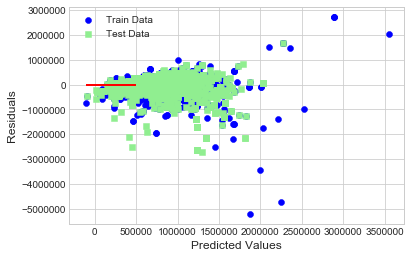

In [62]:
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -100000, xmax = 500000, lw = 2, color = 'red')
#plt.xlim([10, 50])
plt.show()

#### normalize

In [56]:
clf = linear_model.LinearRegression(normalize=True)
 
# 説明変数に "SalePrice品質スコア以外すべて)" を利用
explanatory_variable = train_df2.drop("normalizedPrice", axis=1)
X = explanatory_variable.as_matrix()
 
# 目的変数に "SalePrice(品質スコア)" を利用
y = train_df2['normalizedPrice'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":explanatory_variable.columns,"Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


                                             Name   Coefficients
30                                       latitude -416712.875081
31                         attributes.middleHouse -158776.380760
29                                      longitude -135570.715167
26                          transitsNoWalkingWork  -53810.764391
7                   attributesOutside.propBalcony  -18975.127501
40    attributesTechnology.separateWashingMachine  -18194.858768
38       attributesTechnology.isMinergieCertified  -17369.680294
36                           attributesSize.floor  -16277.946230
9                   attributesOutside.propParking  -12712.557854
5                    attributesInside.nrBathRooms  -11118.338620
10                  attributesSize.numberOfFloors   -6983.921366
11                          attributesSize.volume     -46.050490
23                           routeDurationSecCity     -30.948452
15             attributesSurrounding.distanceShop     -24.291097
3                        

In [57]:
clf = linear_model.LinearRegression(normalize=True)
 
# 説明変数に "SalePrice品質スコア以外すべて)" を利用
explanatory_variable = train_df2.drop("normalizedPrice", axis=1)
X = explanatory_variable.as_matrix()
 
# 目的変数に "SalePrice(品質スコア)" を利用
y = train_df2['normalizedPrice'].as_matrix()
 
# 予測モデルを作成
clf.fit(X, y)
 
# 偏回帰係数
print(pd.DataFrame({"Name":explanatory_variable.columns,"Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/sspaeti/anaconda3/envs/real-estate/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


                                             Name   Coefficients
30                                       latitude -416712.875081
31                         attributes.middleHouse -158776.380760
29                                      longitude -135570.715167
26                          transitsNoWalkingWork  -53810.764391
7                   attributesOutside.propBalcony  -18975.127501
40    attributesTechnology.separateWashingMachine  -18194.858768
38       attributesTechnology.isMinergieCertified  -17369.680294
36                           attributesSize.floor  -16277.946230
9                   attributesOutside.propParking  -12712.557854
5                    attributesInside.nrBathRooms  -11118.338620
10                  attributesSize.numberOfFloors   -6983.921366
11                          attributesSize.volume     -46.050490
23                           routeDurationSecCity     -30.948452
15             attributesSurrounding.distanceShop     -24.291097
3                        

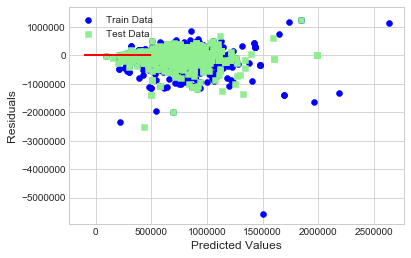

In [58]:
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -100000, xmax = 500000, lw = 2, color = 'red')
#plt.xlim([10, 50])
plt.show()

In [59]:
#Y_pred = clf.predict(test_df2)